In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 데이터셋 설명

In [2]:
## 데이터셋 설명

## 1. 데이터 로드
- medical_data.csv를 로드

In [3]:
df = pd.read_csv("medical_data.csv")

## 2. 데이터의 처음 5개 값 출력

In [4]:
df.head(5)

,inst_id,OC,sido,openDate,bedCount,instkind,revenue,salary,profit,debt,netAsset,employee,ownerChange
0,1,open,choongnam,20071228,175.0,nursing_hospital,4.217530e+09,2.033835e+09,225169678.0,6.828260e+08,2.844460e+09,62.0,same
1,3,open,gyeongnam,19970401,410.0,general_hospital,NaN,NaN,NaN,NaN,NaN,801.0,same
2,4,open,gyeonggi,20161228,468.0,nursing_hospital,1.004522e+09,2.964023e+08,41864754.0,9.241434e+07,3.005088e+08,234.0,same
3,7,open,incheon,20000814,353.0,general_hospital,7.250734e+10,3.178605e+10,902830288.0,4.236380e+10,1.385710e+10,663.0,same
4,9,open,gyeongnam,20050901,196.0,general_hospital,4.904354e+10,2.446078e+10,80749696.0,4.989811e+10,8.631164e+07,206.0,same


## 3. 수치형 변수의 통계 정보 확인

In [5]:
df.describe(exclude=[object])

,inst_id,openDate,bedCount,revenue,salary,profit,debt,netAsset,employee
count,301.000000,3.010000e+02,296.000000,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,291.000000
mean,219.056478,2.005013e+07,145.709459,1.288175e+10,5.654115e+09,2.101700e+08,8.765310e+09,5.938213e+09,142.546392
std,121.234869,8.893815e+04,118.923890,2.043543e+10,8.083343e+09,1.134673e+09,1.286112e+10,1.266035e+10,160.191073
min,1.000000,1.978012e+07,0.000000,0.000000e+00,0.000000e+00,-4.696701e+09,0.000000e+00,-2.019624e+10,0.000000
25%,112.000000,2.001102e+07,52.750000,3.252112e+09,1.626053e+09,-2.168279e+06,1.953077e+09,1.224795e+09,53.500000
50%,230.000000,2.007113e+07,136.500000,5.524218e+09,2.659892e+09,8.130751e+07,4.457667e+09,3.033907e+09,80.000000
75%,321.000000,2.011102e+07,193.000000,1.274839e+10,6.363400e+09,2.930329e+08,9.437917e+09,5.982550e+09,181.500000
max,428.000000,2.017061e+07,656.000000,1.510000e+11,6.403559e+10,7.475427e+09,8.669725e+10,1.390000e+11,1200.000000


## 4. 수치형 변수 값에 결측치가 하나라도 존재하는 병원 데이터 전체를 삭제

In [6]:
numeric_columns = df.describe(exclude=[object]).columns
df.dropna(subset=numeric_columns, inplace=True)
df

,inst_id,OC,sido,openDate,bedCount,instkind,revenue,salary,profit,debt,netAsset,employee,ownerChange
0,1,open,choongnam,20071228,175.0,nursing_hospital,4.217530e+09,2.033835e+09,2.251697e+08,6.828260e+08,2.844460e+09,62.0,same
2,4,open,gyeonggi,20161228,468.0,nursing_hospital,1.004522e+09,2.964023e+08,4.186475e+07,9.241434e+07,3.005088e+08,234.0,same
3,7,open,incheon,20000814,353.0,general_hospital,7.250734e+10,3.178605e+10,9.028303e+08,4.236380e+10,1.385710e+10,663.0,same
4,9,open,gyeongnam,20050901,196.0,general_hospital,4.904354e+10,2.446078e+10,8.074970e+07,4.989811e+10,8.631164e+07,206.0,same
5,11,open,gyeongnam,20020501,243.0,general_hospital,3.358054e+10,1.665533e+10,-4.622738e+07,0.000000e+00,0.000000e+00,397.0,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,418,open,gyeonggi,20120312,109.0,hospital,4.303270e+09,2.228914e+09,3.409870e+08,4.942362e+09,2.978770e+09,75.0,same
294,419,open,gyeongnam,20101104,367.0,nursing_hospital,1.207963e+10,5.691328e+09,4.788074e+08,8.097221e+09,9.544034e+09,180.0,same
295,420,open,gyeonggi,20110523,0.0,nursing_hospital,5.500472e+09,2.653680e+09,2.456945e+08,4.478687e+09,4.583514e+09,62.0,same
296,422,open,jeonnam,20050211,214.0,nursing_hospital,7.614697e+09,3.467861e+09,5.943868e+08,8.715369e+09,5.973889e+09,193.0,same


## 5. 당기순이익이 높은 상위 10개 병원의 병원 고유 번호, 영업/폐업 분류, 병원 설립일, 병원 종류 정보 출력

In [7]:
df.sort_values(by='profit', ascending=False)[['inst_id', 'OC', 'openDate', 'instkind']].head(10)

,inst_id,OC,openDate,instkind
292,417,open,20020401,general_hospital
276,390,open,20071031,nursing_hospital
272,383,open,20160826,hospital
273,384,open,20140804,general_hospital
221,317,open,20070104,general_hospital
267,375,open,19920801,hospital
245,350,open,19970728,clinic
75,112,open,20070807,nursing_hospital
41,65,open,20110512,hospital
243,347,open,19920930,hospital


## 6. 병원 종류 별 총 직원 수의 평균값 출력

In [8]:
df.groupby(by='instkind').mean()['employee']

instkind
clinic                   84.764706
dental_clinic           107.000000
general_hospital        384.848485
hospital                126.048193
nursing_hospital         97.122302
traditional_clinic       79.666667
traditional_hospital     43.000000
Name: employee, dtype: float64

## 7. 대표자가 변동된 병원들의 병원 고유 번호, 영업 폐업 분류 출력

In [9]:
df[df['ownerChange']=='change'][['inst_id','OC']]

,inst_id,OC
12,22,open
16,33,open
17,34,open
21,38,open
22,39,open
35,58,close
63,97,open
72,108,open
90,137,open
96,144,open


## 8. 병원 종류 별 평균 급여를 boxplot 으로 출력

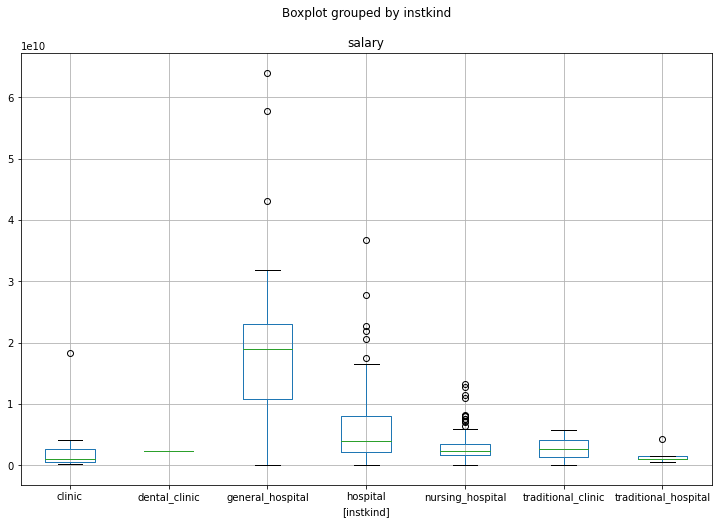

In [10]:
df.boxplot(column=['salary'], by=['instkind'], figsize=(12,8))
plt.show()